In [21]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
colors = {"tblis" : "olive", "gsl" : "green", "blas" : "red", "taco" : "blue", "gsl_tensor" : "cyan", \
          "dot_blas" : "gold", "dot_gsl" : "grey", "gemv_blas" : "purple", "gemv_gsl" : "pink", "mkl" :"black", "cuda":"green",\
         "dot_mkl" : "silver", "gemv_mkl" : "yellow"}

markers = {"tblis" : "o", "gsl" : "p", "blas" : "*", "taco" : ".", "gsl_tensor" : ".", \
          "dot_blas" : ".", "dot_gsl" : ".", "gemv_blas" : ".", "gemv_gsl" : "p", "mkl" :"v", "cuda":"s",\
         "dot_mkl" : ".", "gemv_mkl" : "."}
                      
linestyles = {"tblis" : "-", "gsl" : "-", "blas" : "-", "taco" : "-", "gsl_tensor" : "-", \
          "dot_blas" : "-", "dot_gsl" : "-", "gemv_blas" : "-", "gemv_gsl" : "-", "mkl" :"--", "cuda":"-",\
         "dot_mkl" : "-", "gemv_mkl" : "-"}

In [70]:
def save_plots_seperate(name, directory, systems, expr, interval, start, split, result_dir=""):
    
    result = None
    
    for system in systems:
        data = json.load(open(f'{directory}/{name}/{result_dir}/{system}'))
        df = pd.DataFrame(data["benchmarks"])
        df = df[df['aggregate_name'] == "median"]['real_time']
        df = df.reset_index(drop=True)
        df = df.rename_axis('dimension').reset_index()
        df['dimension'] = df['dimension']*interval + start
        #df['plot_marker'] = markers[system]
        
        df.rename(columns = {'real_time': f'{system}_real_time'}, inplace = True)
        
        if result is None:
            result = df
        else:
            result = pd.merge(result, df, on='dimension', how='outer')
        
        
    full_plt = result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems],  
                           color=[colors[system] for system in systems], 
                           #marker='plot_marker',
                           title=expr)
    
    for i, line in enumerate(full_plt.get_lines()):
        line.set_marker(markers[systems[i]])
        line.set_linestyle(linestyles[systems[i]])

    plt.ylabel('Real Time (ms)')
    plt.xlabel('Dimension')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/raw_graph.svg', format="svg")

    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax)
    result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax2)    
    
    full_plt = result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)
    
    for i, line in enumerate(full_plt.get_lines()):
        line.set_marker(markers[systems[i]])
        line.set_linestyle(linestyles[systems[i]])
    full_plt.legend(full_plt.get_lines(), [f'{i}_real_time' for i in systems])

    plt.yscale("log")
    plt.ylabel('Real Time (ms)')
    plt.xlabel('Dimension')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/log_graph.svg', format="svg")
    
    

In [81]:
def save_plots_seperate_sparsity(name, directory, systems, expr, split, sparse, result_dir=""):
    
    result = None
    
    for system in systems:
        data = json.load(open(f'{directory}/{name}/{result_dir}/{system}'))
        df = pd.DataFrame(data["benchmarks"])
        df = df.reset_index(drop=True)
        df = df.rename_axis('sparisty').reset_index()
        df.rename(columns = {'real_time': f'{system}_real_time'}, inplace = True)
        
        if result is None:
            result = df
        else:
            result = pd.merge(result, df, on='sparisty', how='outer')
        
    
    sparse = [str(i) for i in sparse]
    result['sparisty'] = sparse
    full_plt = result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)

    for i, line in enumerate(full_plt.get_lines()):
        line.set_marker(markers[systems[i]])
        line.set_linestyle(linestyles[systems[i]])
    full_plt.legend(full_plt.get_lines(), [f'{i}_real_time' for i in systems])
        
    plt.ylabel('Real Time (ms)')
    plt.xlabel('sparisty')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/raw_graph.svg', format="svg")

    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax)
    result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax2)
    
    maximum = max([result[f'{i}_real_time'].max() for i in systems])
    
    
    ax2.set_ylim(0, split) 
    ax.set_ylim(split, maximum)
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()
    
    f.suptitle(expr)
    plt.ylabel('Real Time (ms)')
    plt.xlabel('sparisty')
        
    plt.savefig(f'{directory}/{name}/{result_dir}/split_graph.svg', format="svg")
    
    
    full_plt = result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)
    for i, line in enumerate(full_plt.get_lines()):
        line.set_marker(markers[systems[i]])
        line.set_linestyle(linestyles[systems[i]])
    full_plt.legend(full_plt.get_lines(), [f'{i}_real_time' for i in systems])
    
    plt.yscale("log")
    plt.ylabel('Real Time (ms)')
    plt.xlabel('sparisty')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/log_graph.svg', format="svg")

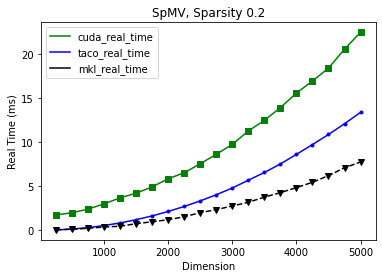

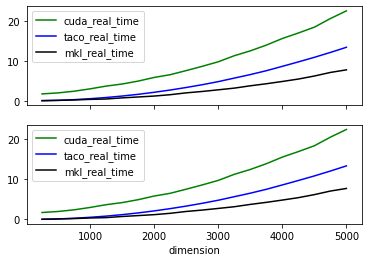

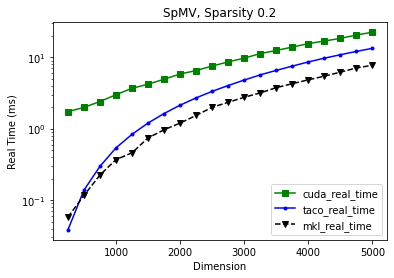

In [82]:
save_plots_seperate("spmv", "./", \
                     ["cuda", "taco", "mkl"],\
                     "SpMV, Sparsity 0.2", 250, 250, 0.5)

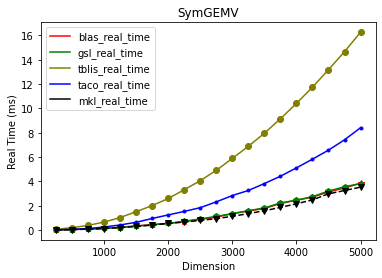

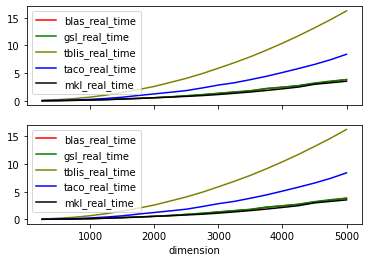

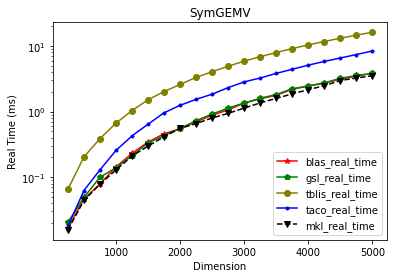

In [83]:
save_plots_seperate("symmgemv", "./", \
                     ["blas", "gsl", "tblis", "taco", "mkl"],\
                     "SymGEMV", 250, 250, 0.5)

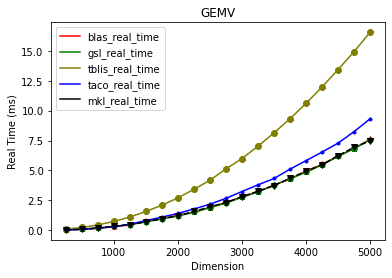

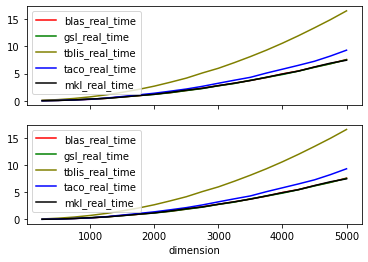

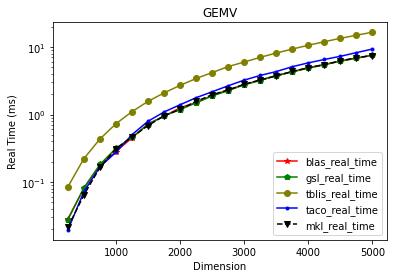

In [84]:
save_plots_seperate("gemv", "./", \
                     ["blas", "gsl", "tblis", "taco", "mkl"],\
                     "GEMV", 250, 250, 0.5)

/tmp/ipykernel_272924/3031784247.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'iterations_x', 'time_unit_x', 'repetition_index_x', 'cpu_time_x', 'name_x', 'threads_x', 'per_family_instance_index_x', 'repetitions_x', 'family_index_x', 'run_name_x', 'run_type_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = pd.merge(result, df, on='sparisty', how='outer')
/tmp/ipykernel_272924/3031784247.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'iterations_x', 'time_unit_x', 'repetition_index_x', 'cpu_time_x', 'name_x', 'threads_x', 'per_family_instance_index_x', 'repetitions_x', 'family_index_x', 'run_name_x', 'run_type_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = pd.merge(result, df, on='sparisty', how='outer')


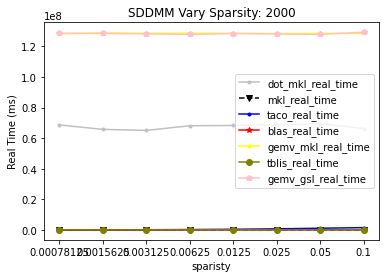

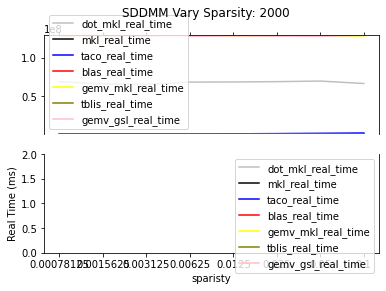

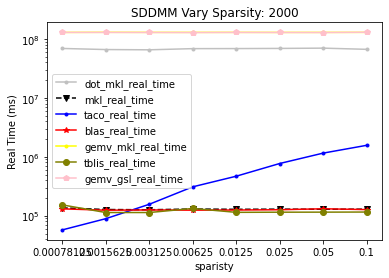

In [85]:
save_plots_seperate_sparsity("sddmm_varSparsity", "./", \
                             ["dot_mkl", "mkl","taco", "blas", "gemv_mkl", "tblis", "gemv_gsl"], \
                             "SDDMM Vary Sparsity: 2000", 2,  [0.00078125, 0.0015625, 0.003125, 0.00625, 0.0125, 0.025, 0.05, 0.1])

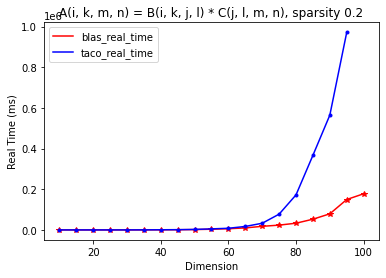

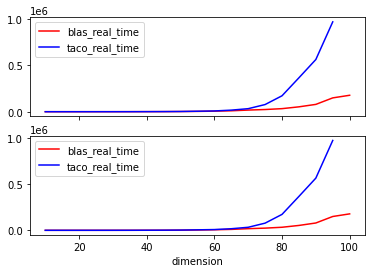

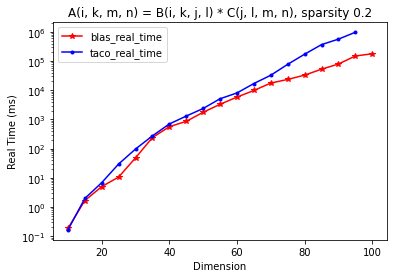

In [86]:
save_plots_seperate("blockedSparse_4T", "./", ["blas", "taco"],\fin
                    "A(i, k, m, n) = B(i, k, j, l) * C(j, l, m, n), sparsity 0.2", 5, 10, 0.5)